# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for statistics
import statsmodels.api as sm
from scipy import stats

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

# Packages for Machine Learning methods
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")
df = df0

# Display first few rows of the dataframe
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
df.shape

(14999, 10)

In [4]:
df.dropna

<bound method DataFrame.dropna of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Gather basic information about the data
df['satisfaction_level'].describe()


count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [7]:
df['average_monthly_hours'] = df['average_montly_hours']
df['average_monthly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_monthly_hours, dtype: float64

In [8]:
print(df['left'].value_counts())
print(df['Work_accident'].value_counts())

0    11428
1     3571
Name: left, dtype: int64
0    12830
1     2169
Name: Work_accident, dtype: int64


### Gather descriptive statistics about the data

In [9]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [10]:
# Display all column names
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary',
       'average_monthly_hours'],
      dtype='object')

In [11]:
# Rename columns as needed
df['work_accident'] = df['Work_accident']
df['department'] = df['Department']
df = df.drop('Work_accident', axis=1)
df = df.drop('Department', axis=1)


# Display all column names after the update
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left',
       'promotion_last_5years', 'salary', 'average_monthly_hours',
       'work_accident', 'department'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [12]:
# Check for missing values
df3 = df.isnull().astype(int)
df3['left'].value_counts()


0    14999
Name: left, dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [13]:
# Check for duplicates
df4 = df[df.duplicated()]


In [14]:
# Inspect some rows containing duplicates as needed
print(df4.head())
print(df4.shape)


      satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_montly_hours  time_spend_company  left  promotion_last_5years  \
396                    139                   3     1                      0   
866                    128                   3     1                      0   
1317                   127                   3     1                      0   
1368                   132                   3     1                      0   
1461                   142                   3     1                      0   

      salary  average_monthly_hours  work_accident  department  
396      low                    139              0       sales  
866      low                

In [15]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df.drop_duplicates()


# Display first few rows of new dataframe as needed
print(df.head())
print(df.shape)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  left  promotion_last_5years  salary  \
0                   3     1                      0     low   
1                   6     1                      0  medium   
2                   4     1                      0  medium   
3                   5     1                      0     low   
4                   3     1                      0     low   

   average_monthly_hours  work_accident department  
0                    157              0      sales  
1                    262              0 

### Check outliers

Check for outliers in the data.

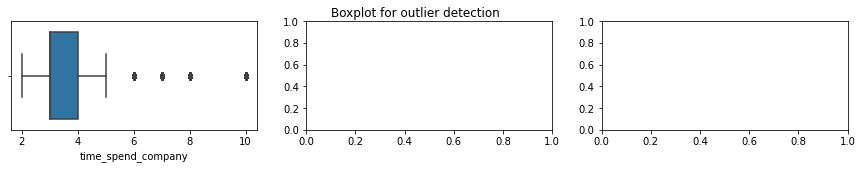

In [16]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplot for outlier detection')
sns.boxplot(ax=axes[0], x=df['time_spend_company'])
plt.show()


In [17]:
# Determine the number of rows containing outliers
# Compute 25th percentile
df['tenure'] = df['time_spend_company']
percentile25 = df['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [18]:
# Get numbers of people who left vs. stayed
print(df['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [19]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left',
       'promotion_last_5years', 'salary', 'average_monthly_hours',
       'work_accident', 'department', 'tenure'],
      dtype='object')

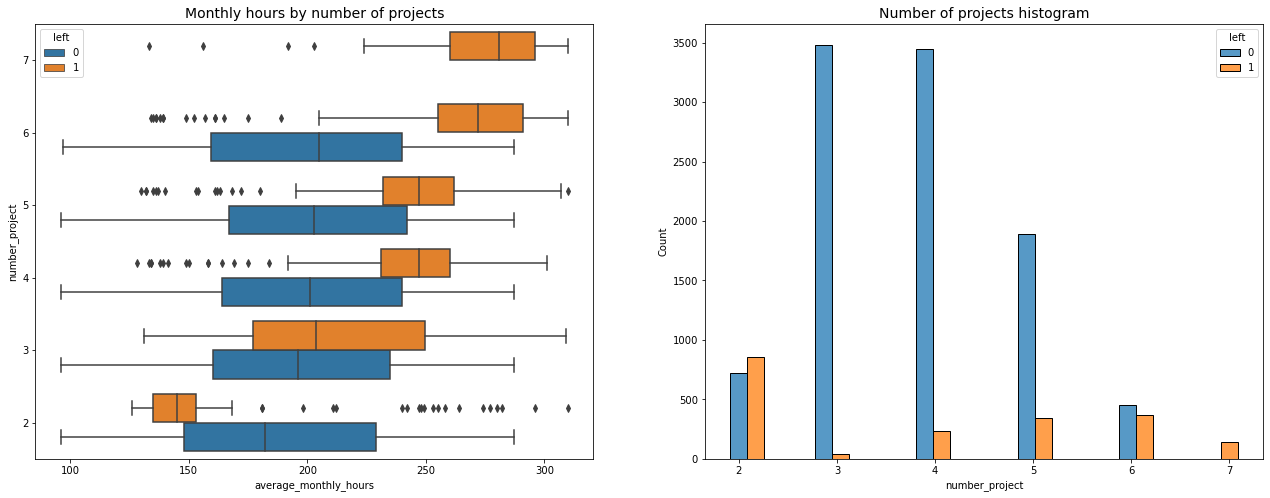

In [20]:
# Create a plot as needed
# Set figure and axes
df1 = df
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()


In [21]:
df_7_projects_left = df[df['number_project']==7]['left']
print(df_7_projects_left.value_counts())
df_low_hours = df[df['average_monthly_hours']<=150]['left']
print(df_low_hours.value_counts())
df_high_hours = df[df['average_monthly_hours']>=250]['left']
print(df_high_hours.value_counts())

1    145
Name: left, dtype: int64
0    1725
1     603
Name: left, dtype: int64
0    1769
1     720
Name: left, dtype: int64


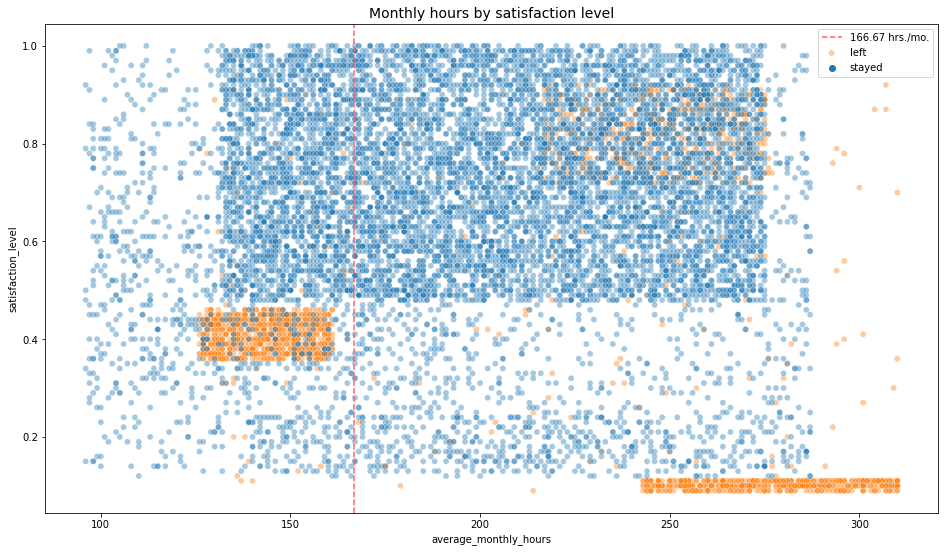

In [22]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction level', fontsize='14');


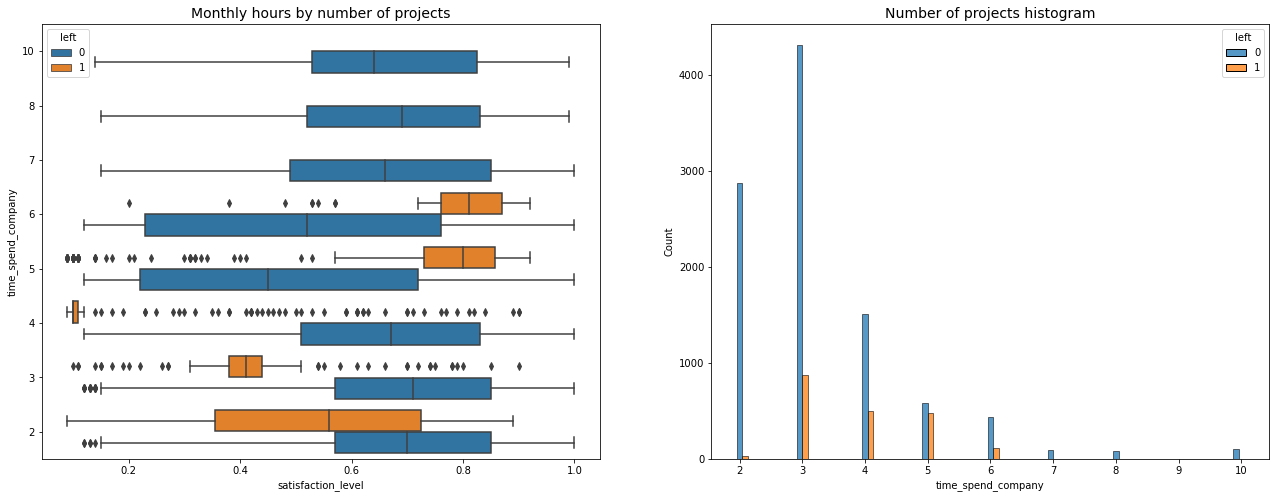

In [23]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='time_spend_company', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='time_spend_company', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()


In [24]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


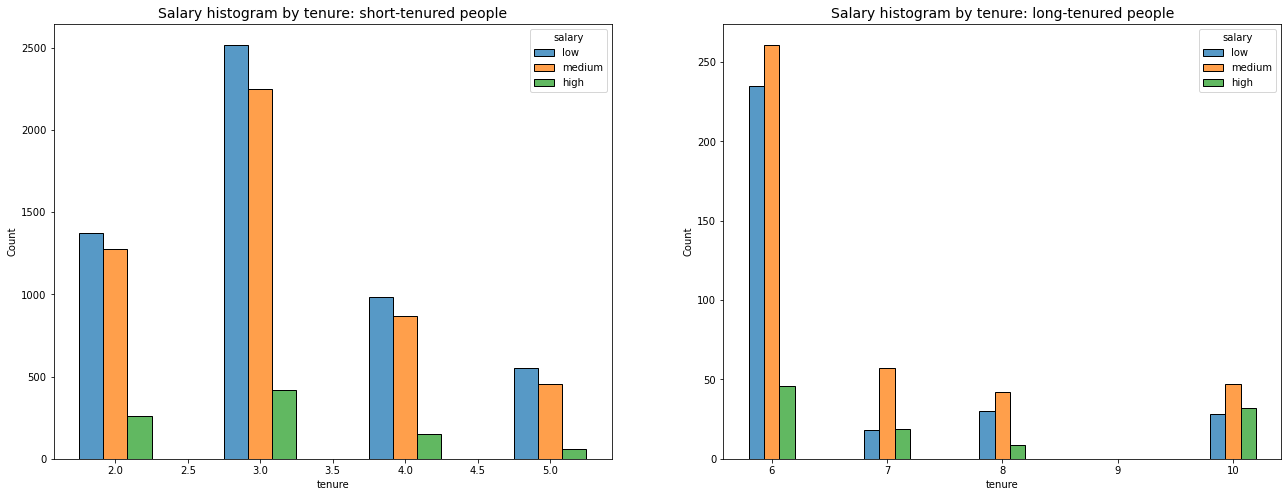

In [25]:
# Create a plot as needed
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))
df1['tenure'] = df1['time_spend_company']
# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 6]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 5]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');


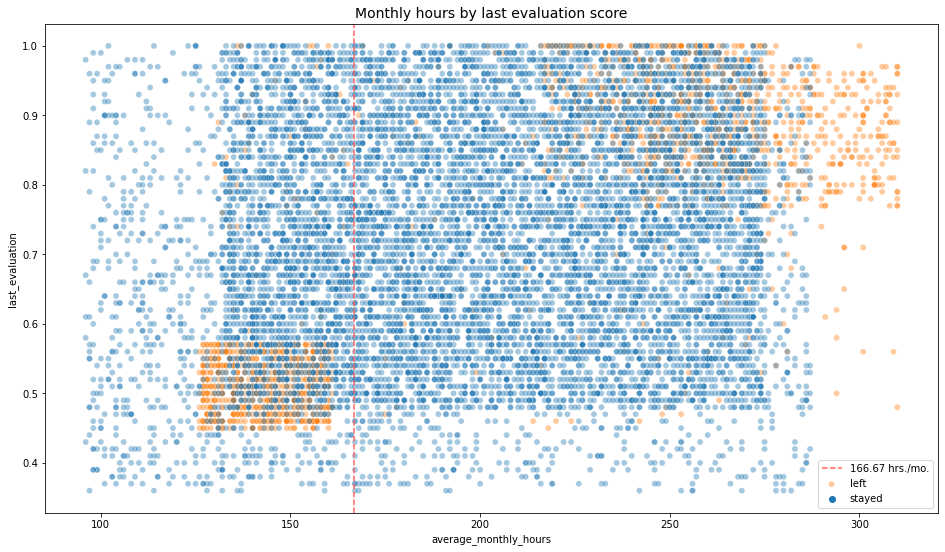

In [26]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


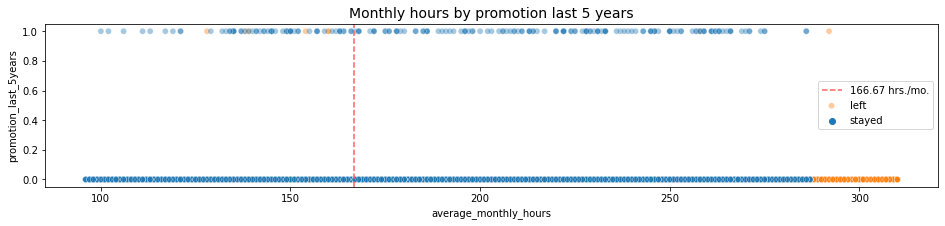

In [27]:
# Create a plot as needed
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');


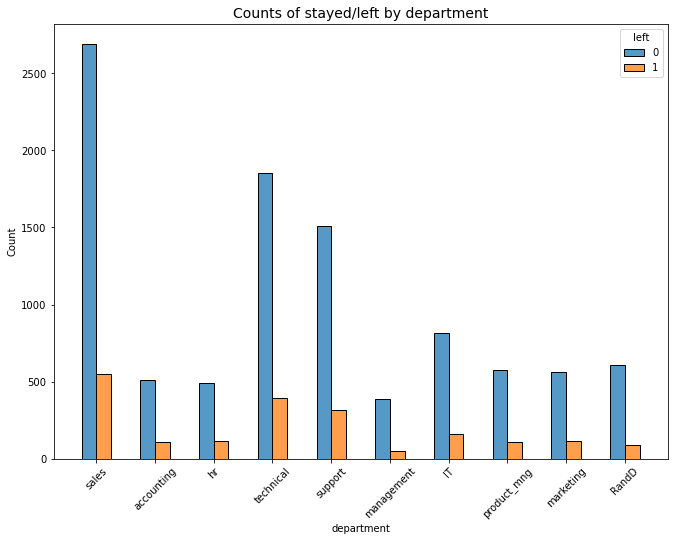

In [28]:
# Create a plot as needed
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


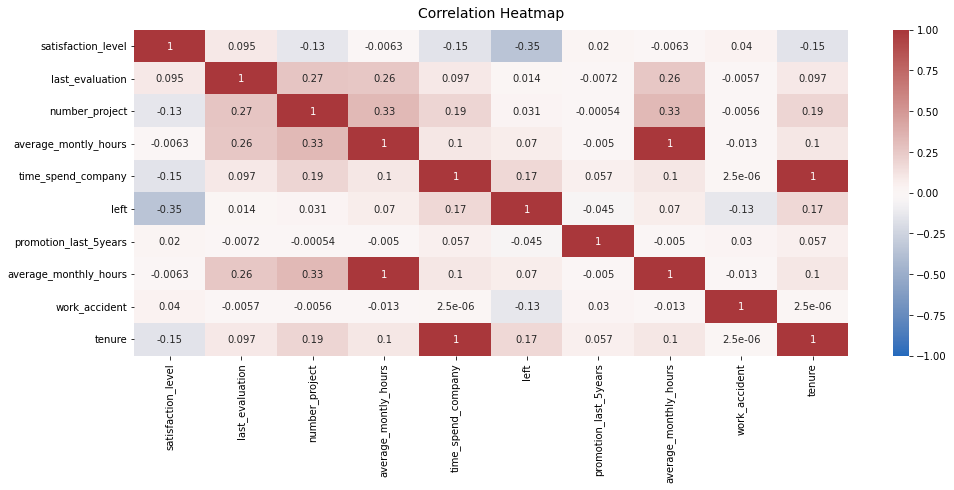

In [29]:
# Create a plot as needed
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);


# Logistic Regression

In [30]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left',
       'promotion_last_5years', 'salary', 'average_monthly_hours',
       'work_accident', 'department', 'tenure'],
      dtype='object')

In [31]:
df_enc = df.copy()
df_enc.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
left                       int64
promotion_last_5years      int64
salary                    object
average_monthly_hours      int64
work_accident              int64
department                object
tenure                     int64
dtype: object

In [32]:
# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
left                        int64
promotion_last_5years       int64
salary                       int8
average_monthly_hours       int64
work_accident               int64
tenure                      int64
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

In [33]:
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary,average_monthly_hours,work_accident,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,1,0,0,157,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,1,0,1,262,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,1,0,1,272,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,1,0,0,223,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,1,0,0,159,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
df_enc = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_enc.shape

(11167, 21)

In [35]:
X = df_enc.drop('left', axis=1)

y = df_enc['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train) 

In [38]:
y_pred = log_clf.predict(X_test)

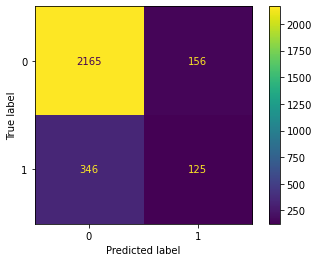

In [39]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)

log_cm_disp.plot(values_format='')

plt.show()

In [40]:
df_enc['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [41]:
from sklearn.metrics import classification_report

In [42]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.27      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

# Approach B: Decision Tree

In [43]:
X = df_enc.drop('left', axis=1)

y = df_enc['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [45]:
Tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

Tree1 = GridSearchCV(Tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [46]:
%%time
Tree1.fit(X_train, y_train)

CPU times: user 3.06 s, sys: 0 ns, total: 3.06 s
Wall time: 3.06 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [47]:
Tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [48]:
Tree1.best_score_

0.9738070859906354

In [49]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [50]:
Tree1_cv_results = make_results('Decision Tree 1', Tree1, 'auc')
Tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree 1,0.959115,0.912839,0.935275,0.978747,0.973807


Decison tree could be prone to overfitting, but random forest won't be as multiple trees to make predictions.



# Random Forest - Round 1

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4,5],
             'n_estimators': [200, 300, 400, 500]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rfcv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [53]:
%%time
rfcv.fit(X_train, y_train)

CPU times: user 23min 45s, sys: 0 ns, total: 23min 45s
Wall time: 23min 45s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [54]:
import pickle

In [55]:
path ='/home/jovyan/work'

In [56]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [57]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

In [58]:
write_pickle(path, rfcv, 'rf1')

In [59]:
rf1 = read_pickle(path, 'rf1')

In [60]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [61]:
rf1.best_score_

0.9804145607221673

In [62]:
rf1_cv_results = make_results('Random Forest 1', rf1, 'auc')
print(Tree1_cv_results)
print(rf1_cv_results)

             model  precision    recall        F1  accuracy       auc
0  Decision Tree 1   0.959115  0.912839  0.935275  0.978747  0.973807
             model  precision    recall        F1  accuracy       auc
0  Random Forest 1   0.968209  0.907171  0.936582  0.979344  0.980415


In [63]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [64]:
rf1_test_scores = get_scores('Random Forest Best', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Random Forest Best,0.982063,0.929936,0.955289,0.985315,0.963245


# Feature Engineering

In [65]:
df_enc2 = df_enc.drop('satisfaction_level', axis=1)
df_enc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary,average_monthly_hours,work_accident,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,1,0,0,157,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,1,0,1,272,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,1,0,0,223,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,1,0,0,159,0,...,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,1,0,0,153,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,1,192,0,...,0,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,1,142,0,...,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,1,229,0,...,0,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,0,0,1,237,1,...,1,0,0,0,0,0,0,0,0,0


In [66]:
df_enc2['overworked'] = (df_enc2['average_monthly_hours'] > 160).astype(int)
df_enc2.head(10)

,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary,average_monthly_hours,work_accident,tenure,...,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,1,0,0,157,0,3,...,0,0,0,0,0,0,1,0,0,0
2,0.88,7,272,4,1,0,1,272,0,4,...,0,0,0,0,0,0,1,0,0,1
3,0.87,5,223,5,1,0,0,223,0,5,...,0,0,0,0,0,0,1,0,0,1
4,0.52,2,159,3,1,0,0,159,0,3,...,0,0,0,0,0,0,1,0,0,0
5,0.50,2,153,3,1,0,0,153,0,3,...,0,0,0,0,0,0,1,0,0,0
6,0.77,6,247,4,1,0,0,247,0,4,...,0,0,0,0,0,0,1,0,0,1
7,0.85,5,259,5,1,0,0,259,0,5,...,0,0,0,0,0,0,1,0,0,1
8,1.00,5,224,5,1,0,0,224,0,5,...,0,0,0,0,0,0,1,0,0,1
9,0.53,2,142,3,1,0,0,142,0,3,...,0,0,0,0,0,0,1,0,0,0
10,0.54,2,135,3,1,0,0,135,0,3,...,0,0,0,0,0,0,1,0,0,0


In [67]:
df_enc2.drop('average_monthly_hours', axis=1)

,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary,work_accident,tenure,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0
2,0.88,7,272,4,1,0,1,0,4,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,223,5,1,0,0,0,5,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,159,3,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0
5,0.50,2,153,3,1,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.64,4,192,3,0,0,1,0,3,0,0,0,0,0,0,0,1,0,0,1
11986,0.50,5,142,4,0,0,1,0,4,1,0,0,0,0,0,0,0,0,0,0
11987,0.79,4,229,4,0,0,1,0,4,0,0,0,0,0,0,1,0,0,0,1
11992,0.85,3,237,3,0,0,1,1,3,1,0,0,0,0,0,0,0,0,0,1


# Decision Tree Round 2

In [68]:
X = df_enc2.drop('left', axis=1)

y = df_enc2['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [70]:
dt2 = DecisionTreeClassifier(random_state=0)

cv_params_dt1 = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]}

scoring_dt1 = {'precision', 'accuracy', 'recall', 'f1', 'roc_auc'}

dt2_cv = GridSearchCV(dt2, cv_params_dt1, scoring=scoring_dt1, cv=4, refit='roc_auc')

In [71]:
%%time
dt2_cv.fit(X_train, y_train)

CPU times: user 2.83 s, sys: 0 ns, total: 2.83 s
Wall time: 2.83 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [72]:
dt2_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [73]:
dt2_cv.best_score_

0.9621975258080149

In [74]:
Tree2_cv_results = make_results("Decision Tree 2", dt2_cv, 'auc')
print(Tree1_cv_results)
print(Tree2_cv_results)

             model  precision    recall        F1  accuracy       auc
0  Decision Tree 1   0.959115  0.912839  0.935275  0.978747  0.973807
             model  precision    recall        F1  accuracy       auc
0  Decision Tree 2   0.943989  0.906463  0.924731  0.975164  0.962198


# Random Forest Round 2

In [ ]:
rf2 = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4,5],
             'n_estimators': [200, 300, 400, 500]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rfcv_2 = GridSearchCV(rf2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rfcv_2.fit(X_train, y_train)

In [ ]:
write_pickle(path, rfcv_2, 'hr_rf2')

In [ ]:
rf2 = read_pickle(path, 'hr_rf2')

In [ ]:
rf2.best_score_

In [ ]:
rf2.best_params_

In [ ]:
rf2_cv_results = make_results("Random Forest 2", rf2, 'auc')
print(Tree2_cv_results)
print(rf2_cv_results)

In [ ]:
rf2_test_scores = get_scores('Random Forest 2 test', rf2, X_test, y_test)
rf2_test_scores

In [ ]:
preds = rf2.best_estimator_.predict(X_test)
cm_rf2 = metrics.confusion_matrix(y_test, preds, labels = clf.classes_)

cm_plot_rf2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf2, display_labels = clf.classes_)

cm_plot_rf2.plt(values_format='')

### Decision Tree Splits

In [ ]:
plt.figure(figsize=(85,20))
plot_tree(dt2_cv.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

## Feature Importance

In [ ]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['Importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='Importance', ascending=False)

tree2_importances['Importance'] = tree2_importances['Importance']*100 

tree2_importances['Importance'] = (tree2_importances['Importance'] & '%').astype(str) 

tree2_importances = tree2_importances[tree2_importances['Importance'] >= 1]

sns.barplot(tree2_importances, y='Importance', x=tree2_importances.index, orient='y')
plt.title('Engineered Decision Tree: Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

In [ ]:
rf2_importances = pd.DataFrame(rf2.best_estimator_.feature_importances_, 
                                 columns=['Importance'], 
                                 index=X.columns
                                )
rf2_importances = rf2_importances.sort_values(by='Importance', ascending=False)

rf2_importances['Importance'] = rf2_importances['Importance']*100 

rf2_importances['Importance'] = (rf2_importances['Importance'] & '%').astype(str)

rf2_importances = rf2_importances[rf2_importances['Importance'] >= 1]

sns.barplot(rf2_importances, y='Importance', x=rf2_importances.index, orient='y')
plt.title('Engineered Random Forest: Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()